# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz
!gunzip SUSY.csv.gz



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  35.7M      0 --:--:--  0:00:24 --:--:-- 25.8M


In [4]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [4]:
!pip install scikit-learn

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [7]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

In [7]:
!pip install --upgrade scikit-learn scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [5]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [8]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

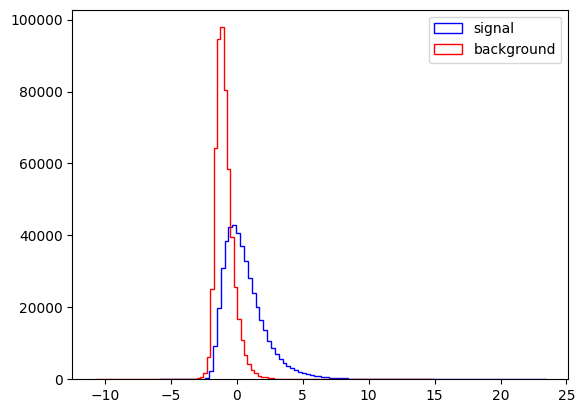

In [9]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

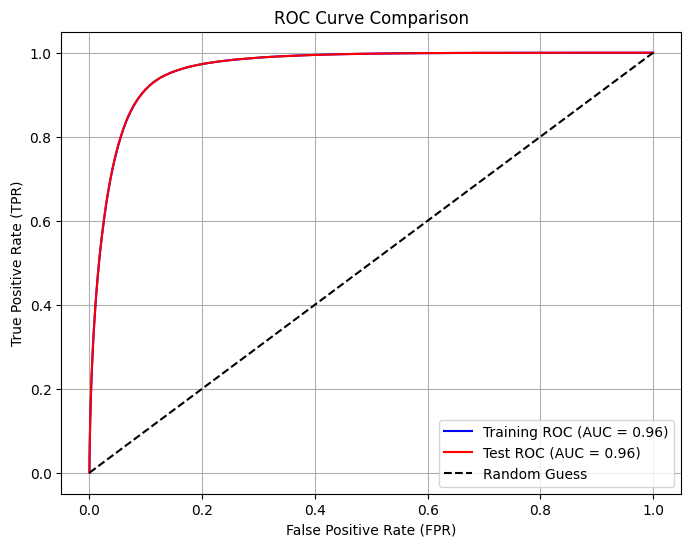

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

dataset = pd.read_csv("SUSY.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

threshold = 0.5
y_binary = (y > threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

Fisher = LDA()
Fisher.fit(X_train, y_train)

y_train_score = Fisher.decision_function(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_score)
roc_auc_train = auc(fpr_train, tpr_train)

y_test_score = Fisher.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Training ROC (AUC = {roc_auc_train:.2f})", color="blue")
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {roc_auc_test:.2f})", color="red")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

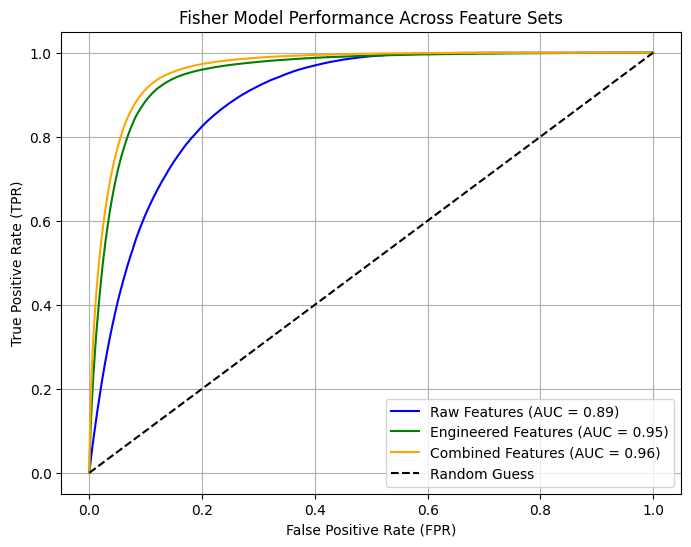

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

dataset = pd.read_csv("SUSY.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

threshold = 0.5
y_binary = (y > threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

raw_feature_count = 10
X_raw = X_train[:, :raw_feature_count]
X_engineered = X_train[:, raw_feature_count:]
X_combined = X_train

Fisher_raw = LDA().fit(X_raw, y_train)
Fisher_engineered = LDA().fit(X_engineered, y_train)
Fisher_combined = LDA().fit(X_combined, y_train)

y_raw_score = Fisher_raw.decision_function(X_test[:, :raw_feature_count])
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_raw_score)
roc_auc_raw = auc(fpr_raw, tpr_raw)

y_engineered_score = Fisher_engineered.decision_function(X_test[:, raw_feature_count:])
fpr_engineered, tpr_engineered, _ = roc_curve(y_test, y_engineered_score)
roc_auc_engineered = auc(fpr_engineered, tpr_engineered)

y_combined_score = Fisher_combined.decision_function(X_test)
fpr_combined, tpr_combined, _ = roc_curve(y_test, y_combined_score)
roc_auc_combined = auc(fpr_combined, tpr_combined)

plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, label=f"Raw Features (AUC = {roc_auc_raw:.2f})", color="blue")
plt.plot(fpr_engineered, tpr_engineered, label=f"Engineered Features (AUC = {roc_auc_engineered:.2f})", color="green")
plt.plot(fpr_combined, tpr_combined, label=f"Combined Features (AUC = {roc_auc_combined:.2f})", color="orange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("Fisher Model Performance Across Feature Sets")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

Logistic Regression Results:
AUC Score: 0.99
Accuracy: 0.97
F1-Score: 0.87


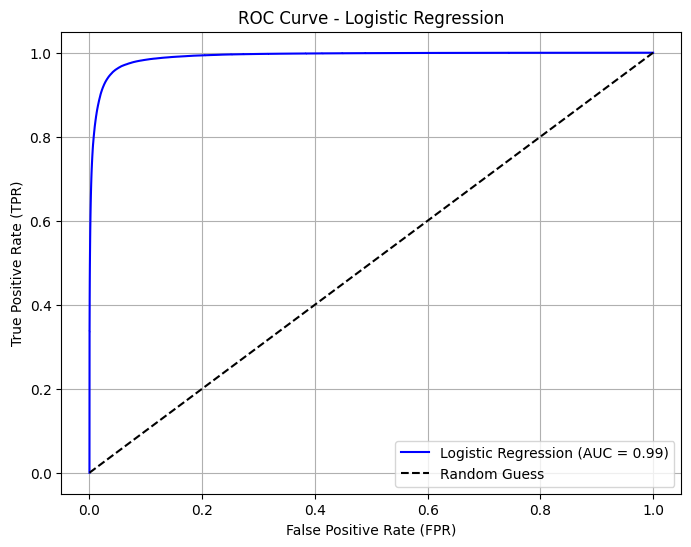

In [12]:
#part a
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression Classifier
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
y_proba = logistic_regression.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Results:")
print(f"AUC Score: {auc_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

def compare_classifiers(classifier, X_train, y_train, X_test, y_test, sample_size=None):
    """
    Train and evaluate a given classifier with optimizations for faster execution.

    Parameters:
        classifier: An instantiated classifier (e.g., LogisticRegression()).
        X_train: Training features.
        y_train: Training labels.
        X_test: Test features.
        y_test: Test labels.
        sample_size: If specified, limits the size of training and test data.

    Returns:
        A dictionary containing evaluation metrics (AUC, accuracy, F1-score).
    """

    if sample_size:
        X_train, y_train = X_train[:sample_size], y_train[:sample_size]
        X_test, y_test = X_test[:sample_size], y_test[:sample_size]

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else None

    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        "Classifier": classifier.__class__.__name__,
        "AUC": auc,
        "Accuracy": accuracy,
        "F1-Score": f1
    }

classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
    SVC(probability=True, kernel='linear')
]

results = []
for clf in classifiers:
    result = compare_classifiers(clf, X_train, y_train, X_test, y_test, sample_size=5000)  # Limit data size
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)


               Classifier       AUC  Accuracy  F1-Score
0      LogisticRegression  0.984222    0.9498  0.749251
1  RandomForestClassifier  0.971688    0.9406  0.682353
2                     SVC  0.986928    0.9578  0.794547


In [14]:
#part c
def compute_significance(N_S, N_B):
    """
    Compute the maximal significance.

    Parameters:
        N_S: Number of signal events.
        N_B: Number of background events.

    Returns:
        Maximal significance (σ_S).
    """
    return N_S / np.sqrt(N_S + N_B)

# Example scenarios
scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000},
]

# Compute significance for each scenario
for scenario in scenarios:
    significance = compute_significance(scenario["N_S"], scenario["N_B"])
    print(f"N_S = {scenario['N_S']}, N_B = {scenario['N_B']}, Significance = {significance:.2f}")


N_S = 10, N_B = 100, Significance = 0.95
N_S = 100, N_B = 1000, Significance = 3.02
N_S = 1000, N_B = 10000, Significance = 9.53
N_S = 10000, N_B = 100000, Significance = 30.15


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


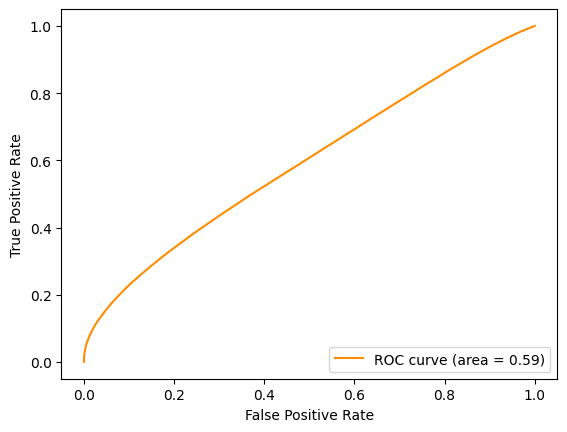

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [17]:
def evaluate_classifier_fast(classifier, X_train, y_train, X_test, y_test, N_S, N_B):
    """
    Faster evaluation of a classifier with reduced dataset and metrics.
    """
    sample_size = 5000
    X_train_sample = X_train[:sample_size]
    y_train_sample = y_train[:sample_size]
    X_test_sample = X_test[:sample_size]
    y_test_sample = y_test[:sample_size]

    classifier.fit(X_train_sample, y_train_sample)
    y_pred = classifier.predict(X_test_sample)

    accuracy = accuracy_score(y_test_sample, y_pred)
    f1 = f1_score(y_test_sample, y_pred)

    significance = N_S / (N_S + N_B)**0.5

    return {
        "Classifier": classifier.__class__.__name__,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Significance": significance
    }

scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000}
]

fast_results = []
for scenario in scenarios:
    for clf in classifiers:
        result = evaluate_classifier_fast(
            clf, X_train, y_train, X_test, y_test, scenario["N_S"], scenario["N_B"]
        )
        result.update(scenario)
        fast_results.append(result)

fast_results_df = pd.DataFrame(fast_results)
print(fast_results_df)


               Classifier  Accuracy  F1-Score  Significance  N_S   N_B
0      LogisticRegression    0.9498  0.749251      0.953463   10   100
1  RandomForestClassifier    0.9422  0.694180      0.953463   10   100
2                     SVC    0.9578  0.794547      0.953463   10   100
3      LogisticRegression    0.9498  0.749251      3.015113  100  1000
4  RandomForestClassifier    0.9434  0.702419      3.015113  100  1000
5                     SVC    0.9578  0.794547      3.015113  100  1000
